In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/project/cleaned_companies_with_id.csv')

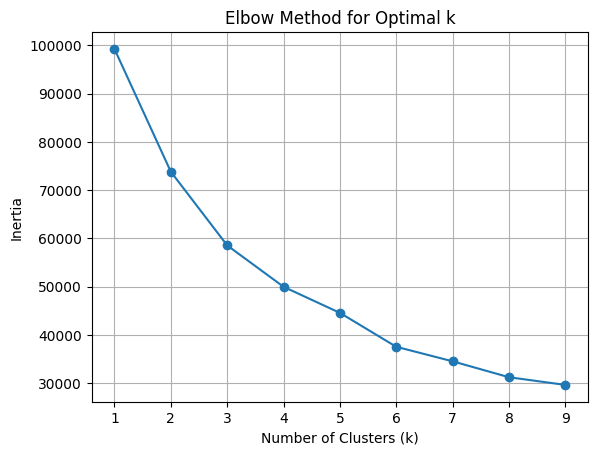

         Annual Revenue  Number of times contacted    duration  \
Cluster                                                          
0          2.170284e+08                  13.419569  733.484245   
1          1.996757e+09                   6.674058  491.964277   
2          1.923932e+08                   5.015902  474.208625   

         Number of Employees  Company Age  
Cluster                                    
0                5568.719261    56.787491  
1                8300.034491    69.238975  
2                1746.758966    39.474073  


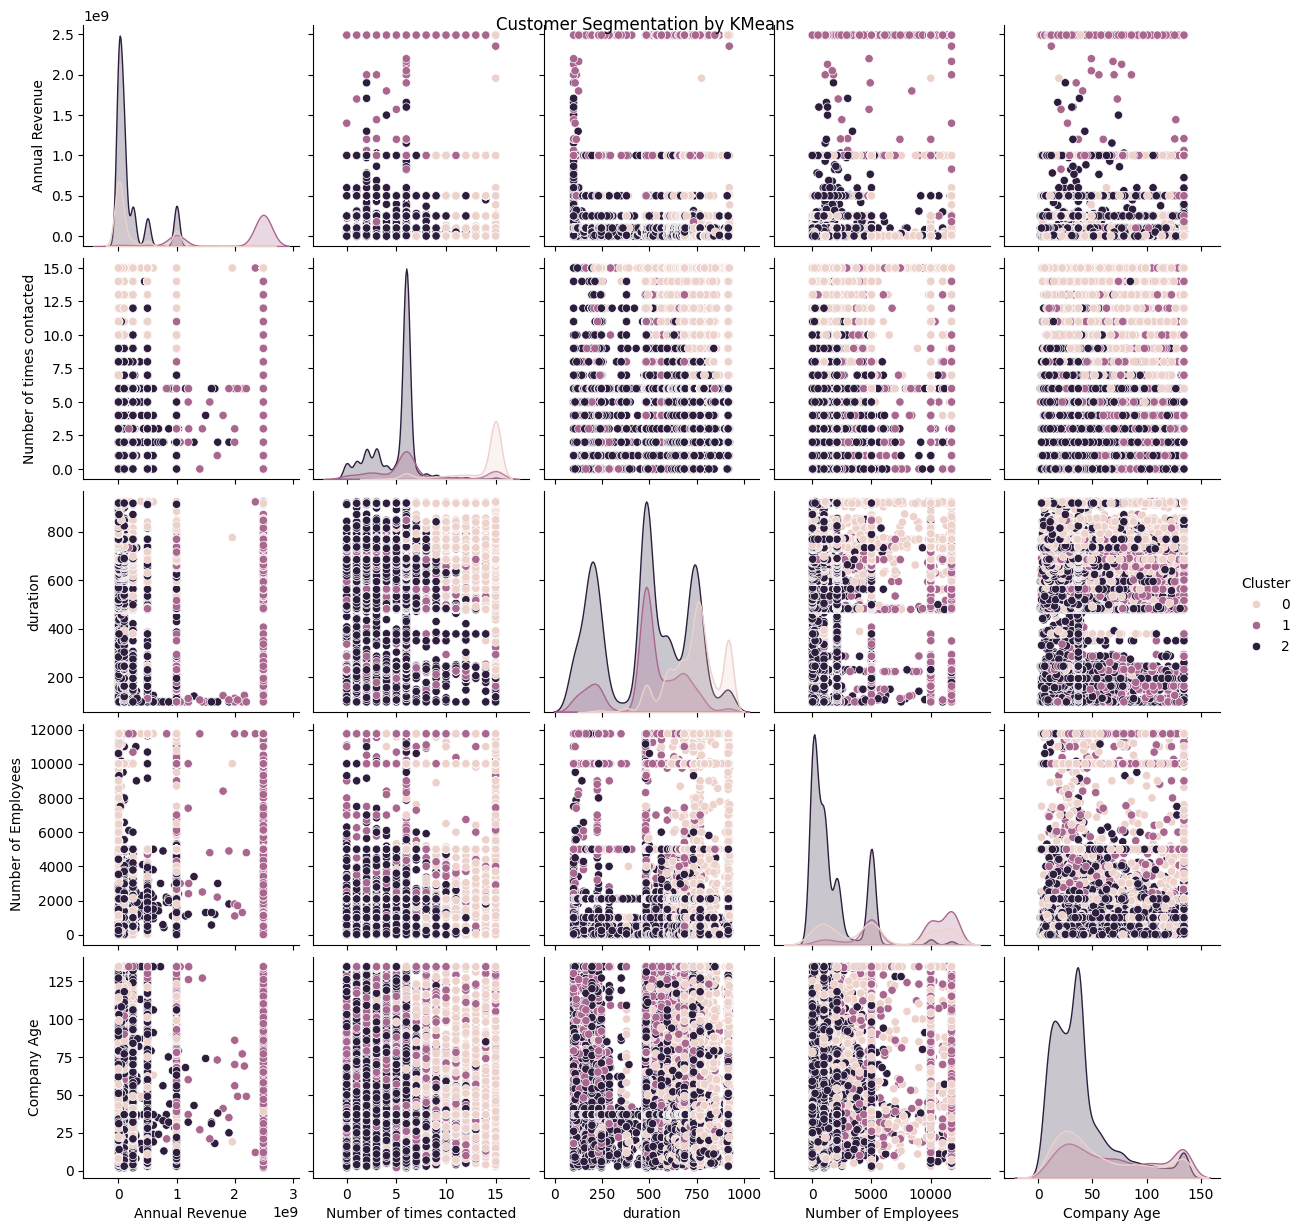

In [ ]:
df['Company Age'] = 2025 - df['Year Founded']

features = ['Annual Revenue', 'Number of times contacted', 'duration',
            'Number of Employees', 'Company Age']
df_cluster = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

sns.pairplot(df, hue='Cluster', vars=features)
plt.suptitle("Customer Segmentation by KMeans")
plt.show()

I selected five variables: annual revenue, contact frequency, relationship duration, number of employees, and company age, and applied the KMeans clustering algorithm to segment client companies

Using the Elbow Method, we determined that the optimal number of clusters is 3. After completing the clustering, I calculated the average feature values for each group. To make the analysis more intuitive and accessible, I converted the numerical values into qualitative labels (such as High / Medium / Low), assigned role-based labels to each cluster, and presented the results on the slide

Key finding: Cluster 1 stands out significantly from the others — it has the highest annual revenue, largest number of employees, and longest company history. Therefore, we define it as the High-Value Client Segment, which should be prioritized in marketing and business strategy